## Stock Price Analysis using nsepy library
The notebook covers predition of future stock price using different approaches such as:
- Simple Moving Averages 
- Weighted Moving Averages 
- Simple Exponential Smoothening  
- FB Prophet 
    - Basic Predictions of Stock 
    - Modelling Trends 
    - Modelling Seasonality 
    - Modelling Uncertainty 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime as dt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from nsepy import get_history
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
sbin = get_history(symbol='SBIN',
                    start=dt.date(2021,1,1), 
                    end=dt.date(2021,4,30))

More stock symbols can be obtained from here - 
https://www1.nseindia.com/live_market/dynaContent/live_watch/equities_stock_watch.htm

In [5]:
sbin.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,SBIN,EQ,274.950,274.900,280.000,274.400,279.050,279.400,278.330,24531791,682796825780000.000,141601,4783442,0.195
2021-01-04,SBIN,EQ,279.400,281.850,283.900,277.750,281.100,281.050,281.410,31450608,885046405845000.125,171760,6521226,0.207
2021-01-05,SBIN,EQ,281.050,278.050,282.450,277.000,281.400,281.750,279.690,27393072,766157430375000.000,155149,4984903,0.182
2021-01-06,SBIN,EQ,281.750,283.000,289.150,281.400,283.900,285.050,285.760,40765708,1164907362810000.000,224327,6201351,0.152
2021-01-07,SBIN,EQ,285.050,289.000,291.800,287.000,288.000,287.700,289.150,30546600,883250185510000.000,183684,8560453,0.280


## Dictionary explaining the dataframe
- Symbol - Name code of Stock. THis is what is listed on exchange 
- Series - Type - Equity, ETF's, MF's, Debt etc 
- VMAP - The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.
- Turnover - Share turnover is a measure of stock liquidity, calculated by dividing the total number of shares traded during some period by the average number of shares outstanding for the same period. The higher the share turnover, the more liquid company shares are.
- % Deliverable -> Deliverable Volumne/Volume

In [6]:
# Let's also look at hdfc stock
hdfc = get_history(symbol='HDFCBANK',
                    start=dt.date(2021,1,1), 
                    end=dt.date(2021,4,30))

In [7]:
hdfc.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,HDFCBANK,EQ,1436.300,1440.000,1443.000,1420.600,1423.450,1425.050,1433.570,4405469,631553342195000.000,85415,1426213,0.324
2021-01-04,HDFCBANK,EQ,1425.050,1438.000,1438.000,1399.000,1422.250,1416.000,1417.200,7870096,1115347328170000.125,177576,3758410,0.478
2021-01-05,HDFCBANK,EQ,1416.000,1419.200,1430.750,1409.000,1425.850,1426.700,1419.930,7193412,1021416060240000.000,186611,3041961,0.423
2021-01-06,HDFCBANK,EQ,1426.700,1435.000,1440.000,1413.100,1419.800,1420.550,1423.550,11067025,1575451101020000.000,151854,4458054,0.403
2021-01-07,HDFCBANK,EQ,1420.550,1432.500,1432.600,1412.550,1416.900,1416.250,1422.340,9947421,1414862331115000.000,127305,4519188,0.454


In [8]:
# Let's look at nifty next 50 data
nifty_next50 = get_history(symbol="NIFTY NEXT 50",
                            start=dt.date(2021,1,1),
                            end=dt.date(2021,5,10),
                            index=True)

In [9]:
nifty_next50.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2021-01-01,32608.950,32807.650,32554.350,32765.950,354161209,55710600000.000
2021-01-04,32998.950,33347.850,32805.300,33281.650,395945593,80398500000.000
2021-01-05,33219.800,33895.900,32986.150,33818.750,341021632,99866900000.000
2021-01-06,33951.200,34068.800,33376.250,33755.500,424441455,121006900000.000
2021-01-07,34074.500,34138.750,33826.300,33889.350,277306833,89928300000.000


You can get more data like - Future Price, Option Price, Index Prices, Derivative, P/E Ratio and etc on https://nsepy.xyz

# Stock EDA

In [10]:
name = "HDFC"
name = str(name)
print("You have choosen the company",name)

You have choosen the company HDFC


In [11]:
# Extracting 3 years of the stock data
data = get_history(symbol=name, 
                   start=dt.date(2018,3,31), end=dt.date(2021,4,30))
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-04-02,HDFC,EQ,1825.600,1830.950,1854.150,1828.950,1837.000,1838.050,1837.110,2607397,479008132589999.938,132089,2107655,0.808
2018-04-03,HDFC,EQ,1838.050,1836.000,1846.550,1815.600,1824.750,1825.700,1827.190,1950749,356439797450000.000,104223,1403865,0.720
2018-04-04,HDFC,EQ,1825.700,1830.700,1831.800,1792.000,1800.000,1803.300,1807.480,2268911,410101472550000.000,116356,1702563,0.750
2018-04-05,HDFC,EQ,1803.300,1821.000,1830.000,1812.200,1824.450,1824.450,1820.170,3549233,646021565910000.000,69131,3094413,0.872
2018-04-06,HDFC,EQ,1824.450,1827.000,1837.800,1820.600,1828.000,1829.000,1830.210,3260963,596824717445000.000,115256,2819664,0.865


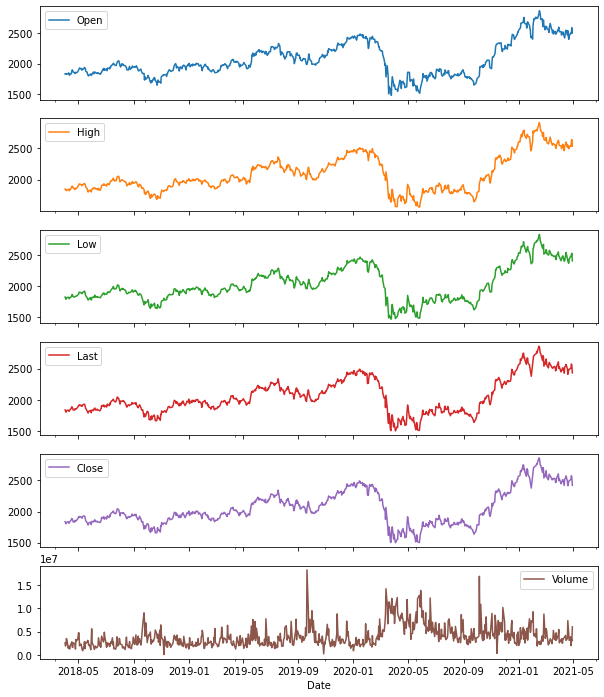

In [12]:
visual_data = data[[ 'Open', 'High', 'Low', 'Last','Close','Volume']]
visual_data.plot(subplots=True, figsize=(10,12))
plt.show()

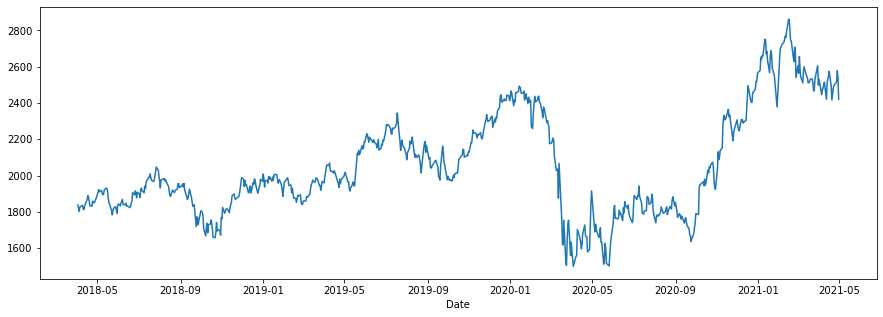

In [13]:
visual_data['Close'].plot(figsize=(15,5))
plt.show()

In [14]:
visual_data = visual_data.reset_index()
visual_data['month'] = visual_data['Date'].apply(lambda x: x.strftime('%Y%m'))
visual_data['month'] = visual_data['month'].apply(lambda x: str(x))
visual_data_month=pd.pivot_table(visual_data,values='Close',index='month',aggfunc=np.mean).reset_index()
visual_data_month.head()

,month,Close
0,201804,1843.560
1,201805,1867.366
2,201806,1859.236
3,201807,1965.802
4,201808,1942.705


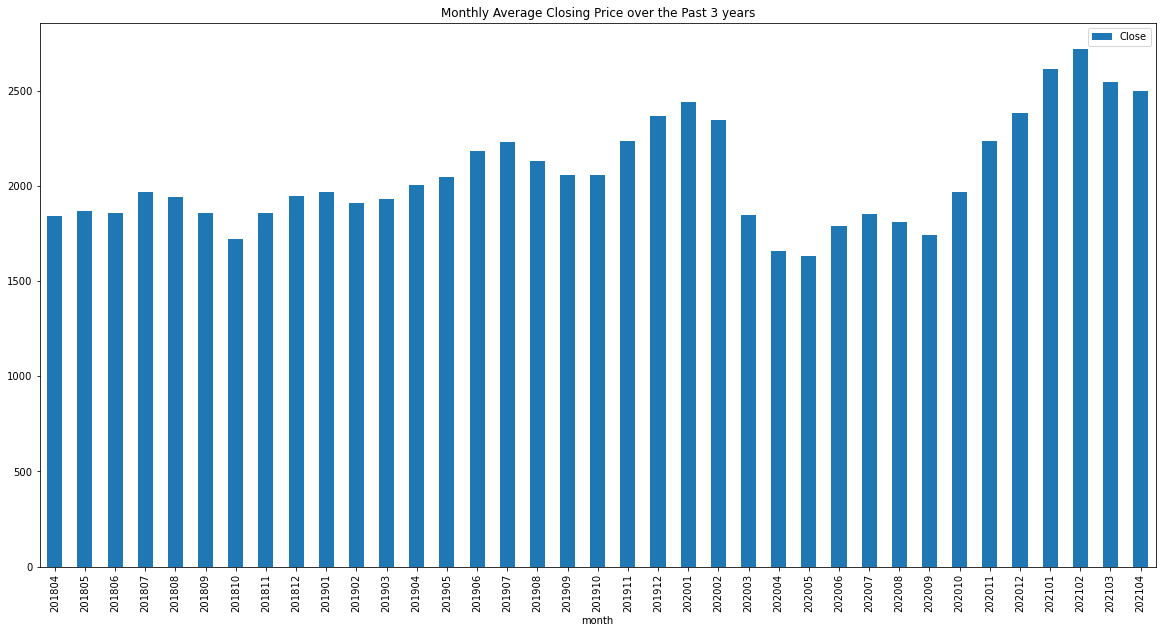

In [15]:
visual_data_month.plot(kind='bar',figsize=(20,10),x='month',y='Close')
plt.title("Monthly Average Closing Price over the Past 3 years")
plt.show()

## Simple Moving Average

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like $\hat{y}_{t} = y_{t-1}$ (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its $k$ previous values. Therefore, we will use the **moving average**.

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$

In [16]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])


# prediction for the last observed day (past 24 hours)
moving_average(data['Close'], 24)

2501.0499999999997

Unfortunately, we cannot make predictions far in the future - in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with [`DataFrame.rolling(window).mean()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [17]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
        
        1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 
        95% of the area under a normal curve

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

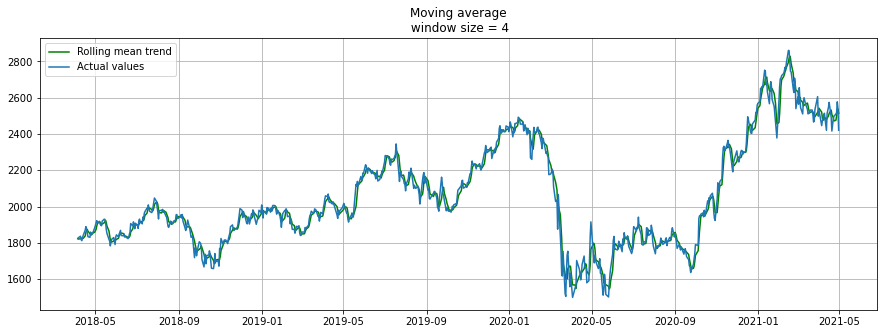

In [18]:
plotMovingAverage(data['Close'], 4)

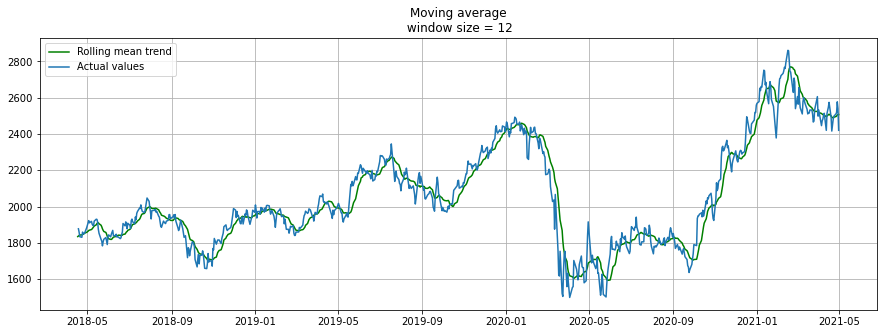

In [19]:
plotMovingAverage(data['Close'], 12)

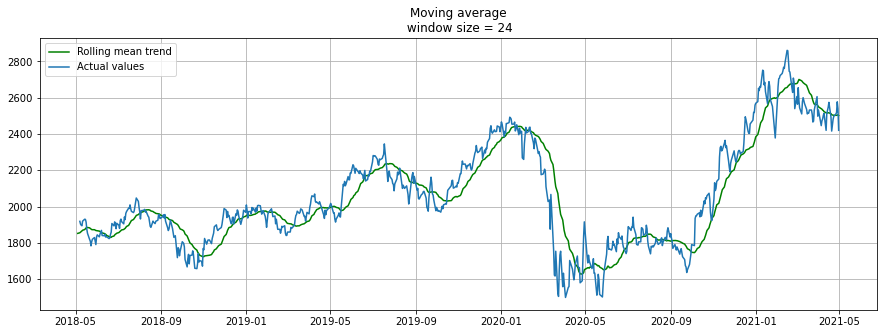

In [20]:
plotMovingAverage(data['Close'], 24)

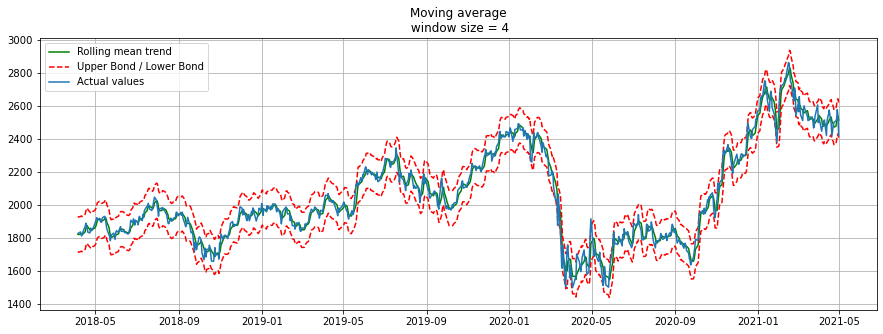

In [21]:
plotMovingAverage(data['Close'], 4, plot_intervals=True)

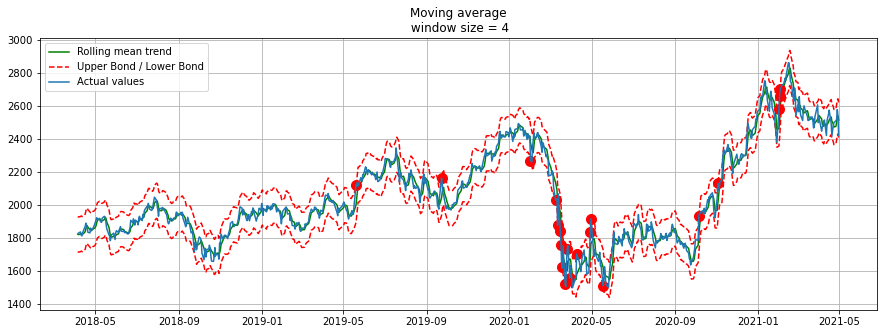

In [22]:
plotMovingAverage(data[['Close']], 4, plot_intervals=True, plot_anomalies=True)

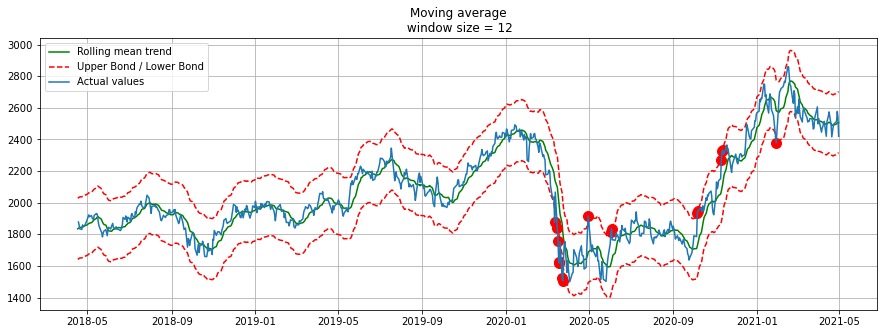

In [23]:
plotMovingAverage(data[['Close']], 12, plot_intervals=True, plot_anomalies=True)

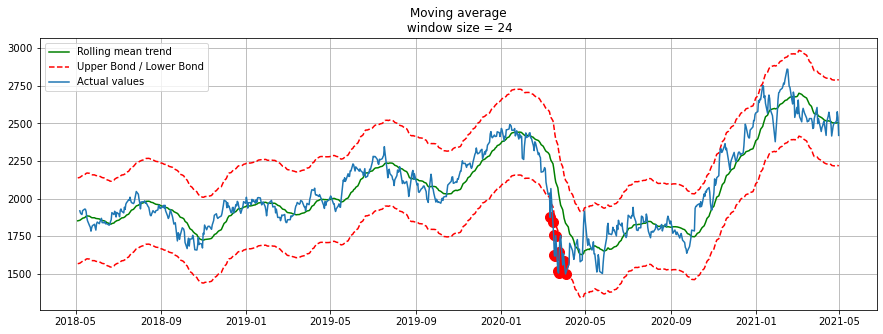

In [24]:
plotMovingAverage(data[['Close']], 24, plot_intervals=True, plot_anomalies=True)

## Weighted Moving Average

**Weighted average** is a simple modification to the moving average. The weights sum up to `1` with larger weights assigned to more recent observations.


$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

In [25]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n - 1] * weights[n]
    return float(result)

In [26]:
weighted_average(data['Close'], [0.6, 0.3, 0.1]) # last three stock values are weigted

2471.415

In [27]:
# just checking
0.6 * data['Close'].iloc[-1] + 0.3 * data['Close'].iloc[-2] + 0.1 * data['Close'].iloc[-3]

2471.415

## Simple Exponential Smoothening

Now, let's see what happens if, instead of weighting the last $k$ values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for **[exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)** that will help us with this:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

Here the model value is a weighted average between the current true value and the previous model values. The $\alpha$ weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller $\alpha$ is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function – we multiply by $(1-\alpha)$ each time, which already contains a multiplication by $(1-\alpha)$ of previous model values.

In [28]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

In [29]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context("seaborn-white"):
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(
                exponential_smoothing(series, alpha), label="Alpha {}".format(alpha)
            )
        plt.plot(series.values, "c", label="Actual")
        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True);

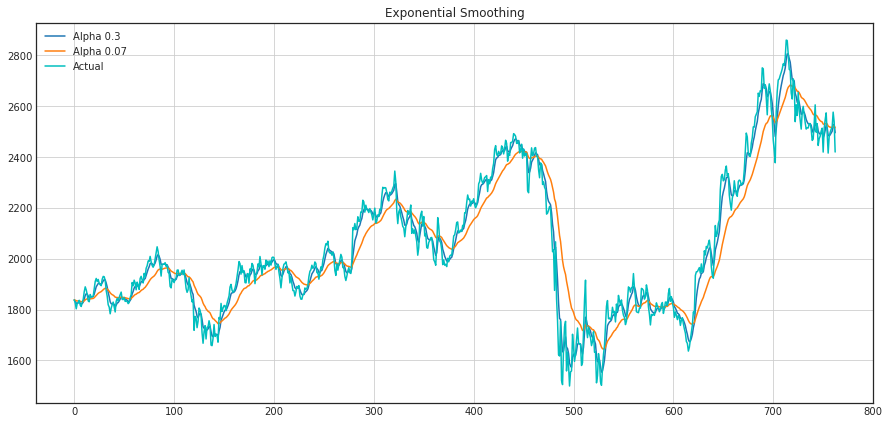

In [30]:
plotExponentialSmoothing(data['Close'], [0.3, 0.07])

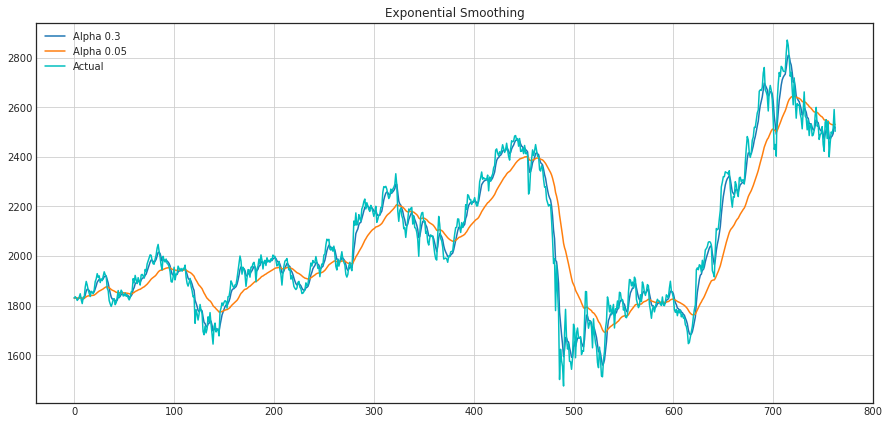

In [31]:
plotExponentialSmoothing(data['Open'], [0.3, 0.05])

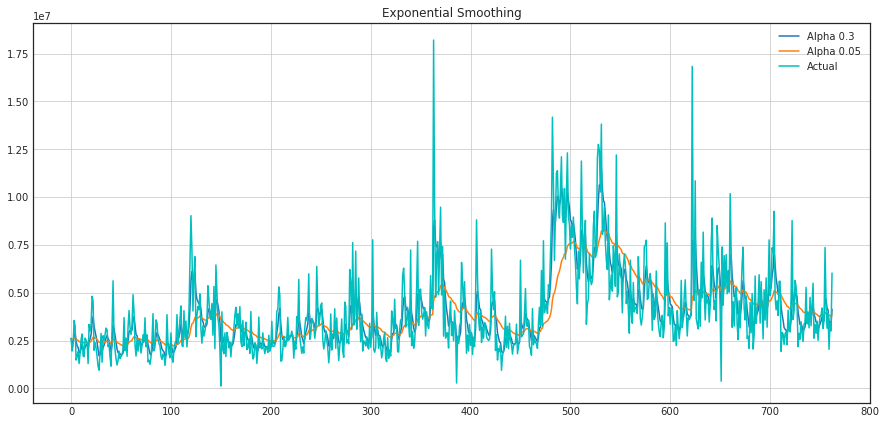

In [32]:
plotExponentialSmoothing(data['Volume'], [0.3, 0.05])

# Modeling through FbProphet 

In [33]:
df = data[['Close']].dropna().drop_duplicates()

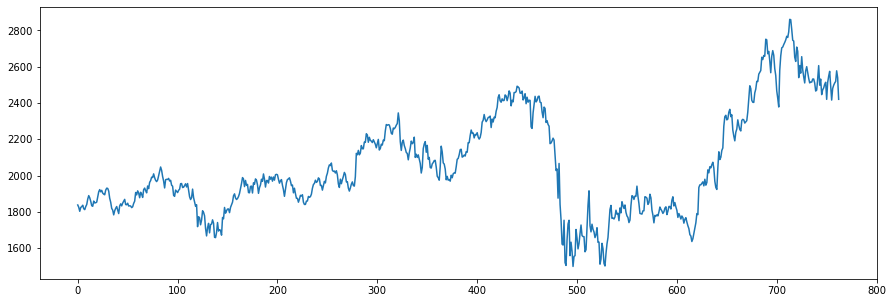

In [34]:
visual_data['Close'].plot(figsize=(15,5))
plt.show()

Let's convert our dataframe to the format required by Prophet:

In [35]:
df = df.reset_index()
df.columns = ["ds", "y"]
df.tail()

,ds,y
746,2021-04-26,2509.800
747,2021-04-27,2518.400
748,2021-04-28,2577.000
749,2021-04-29,2538.850
750,2021-04-30,2420.100


The authors of the library generally advise to make predictions based on at least several months, ideally, more than a year of historical data. Luckily, in our case we have more than a couple of years of data to fit the model.

To measure the quality of our forecast, we need to split our dataset into the *historical part*, which is the first and biggest slice of our data, and the *prediction part*, which will be located at the end of the timeline. We will remove the last month from the dataset in order to use it later as a prediction target:

In [36]:
prediction_size = 30
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
718,2021-03-10,2599.800
719,2021-03-12,2568.000
720,2021-03-15,2535.500


In [37]:
train_df.tail(10)

,ds,y
711,2021-03-01,2606.000
712,2021-03-02,2564.000
713,2021-03-03,2654.900
714,2021-03-04,2582.950
715,2021-03-05,2543.900
716,2021-03-08,2510.250
717,2021-03-09,2577.300
718,2021-03-10,2599.800
719,2021-03-12,2568.000
720,2021-03-15,2535.500


Now we need to create a new `Prophet` object. Here we can pass the parameters of the model into the constructor. But in this example we will use the defaults. Then we train our model by invoking its `fit` method on our training dataset:

In [38]:
m = Prophet()
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Using the helper method `Prophet.make_future_dataframe`, we create a dataframe which will contain all dates from the history and also extend into the future for those 30 days that we left out before.

In [39]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=10)

,ds
741,2021-04-05
742,2021-04-06
743,2021-04-07
744,2021-04-08
745,2021-04-09
746,2021-04-10
747,2021-04-11
748,2021-04-12
749,2021-04-13
750,2021-04-14


We predict values with `Prophet` by passing in the dates for which we want to create a forecast. If we also supply the historical dates (as in our case), then in addition to the prediction we will get an in-sample fit for the history. Let's call the model's `predict` method with our `future` dataframe as an input:

In [40]:
forecast = m.predict(future)
forecast.tail(n=10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
741,2021-04-05,2657.280,2407.020,2595.415,2650.824,2662.695,-152.022,-152.022,-152.022,-5.934,-5.934,-5.934,-146.088,-146.088,-146.088,0.000,0.000,0.000,2505.259
742,2021-04-06,2660.739,2425.164,2604.487,2653.517,2666.808,-143.370,-143.370,-143.370,0.368,0.368,0.368,-143.738,-143.738,-143.738,0.000,0.000,0.000,2517.369
743,2021-04-07,2664.197,2431.868,2610.780,2656.086,2671.014,-138.730,-138.730,-138.730,2.304,2.304,2.304,-141.033,-141.033,-141.033,0.000,0.000,0.000,2525.468
744,2021-04-08,2667.656,2434.405,2623.949,2658.554,2675.409,-136.031,-136.031,-136.031,1.983,1.983,1.983,-138.014,-138.014,-138.014,0.000,0.000,0.000,2531.625
745,2021-04-09,2671.114,2437.571,2629.122,2661.401,2679.639,-135.888,-135.888,-135.888,-1.163,-1.163,-1.163,-134.725,-134.725,-134.725,0.000,0.000,0.000,2535.226
746,2021-04-10,2674.573,2459.772,2640.166,2664.009,2683.691,-122.224,-122.224,-122.224,8.990,8.990,8.990,-131.214,-131.214,-131.214,0.000,0.000,0.000,2552.348
747,2021-04-11,2678.031,2449.026,2644.651,2666.358,2688.330,-134.079,-134.079,-134.079,-6.548,-6.548,-6.548,-127.531,-127.531,-127.531,0.000,0.000,0.000,2543.952
748,2021-04-12,2681.490,2461.889,2642.385,2669.130,2693.061,-129.661,-129.661,-129.661,-5.934,-5.934,-5.934,-123.727,-123.727,-123.727,0.000,0.000,0.000,2551.829
749,2021-04-13,2684.948,2481.815,2660.613,2671.719,2698.048,-119.488,-119.488,-119.488,0.368,0.368,0.368,-119.856,-119.856,-119.856,0.000,0.000,0.000,2565.460
750,2021-04-14,2688.406,2484.710,2666.478,2674.152,2702.420,-113.671,-113.671,-113.671,2.304,2.304,2.304,-115.974,-115.974,-115.974,0.000,0.000,0.000,2574.736


In the resulting dataframe you can see many columns characterizing the prediction, including trend and seasonality components as well as their confidence intervals. The forecast itself is stored in the `yhat` column.

The Prophet library has its own built-in tools for visualization that enable us to quickly evaluate the result.

First, there is a method called `Prophet.plot` that plots all the points from the forecast:

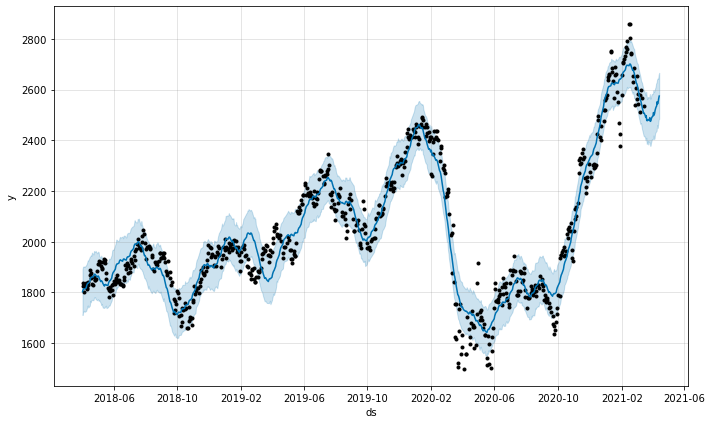

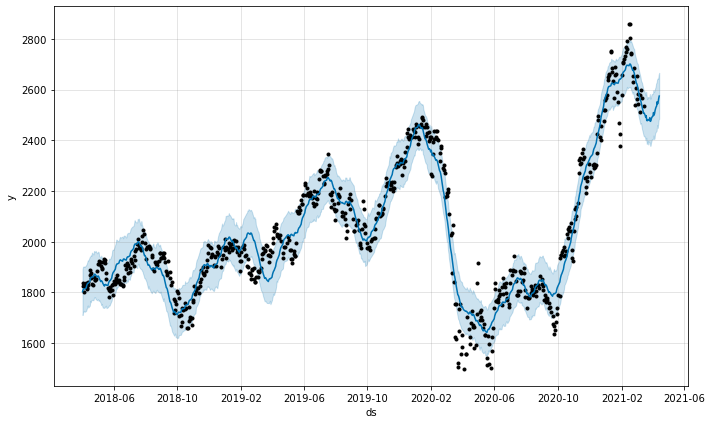

In [41]:
m.plot(forecast)

- Black Dots --> Data used to train the model 
- Blue Line --> Line fitting through Data or Predictions based on learning 
- Blue Haze --> Uncertainty intervals of predictions; lower the better 

The second function `Prophet.plot_components` might be useful in our case. It allows us to observe different components of the model separately: trend, yearly and weekly seasonality. In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.


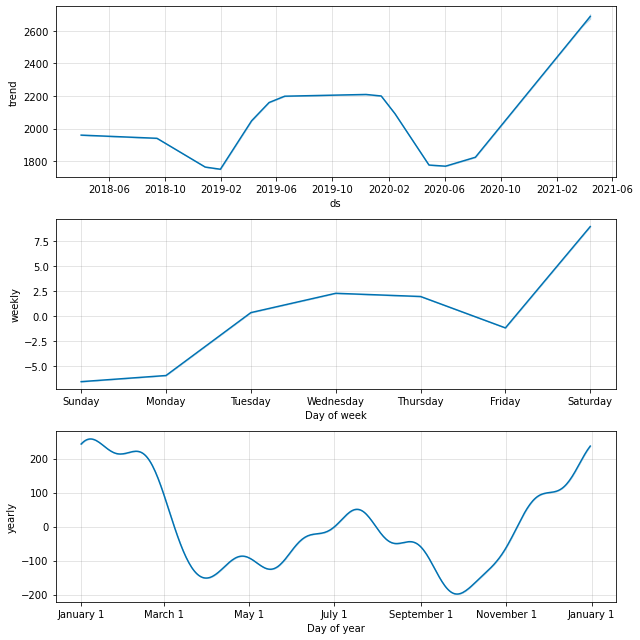

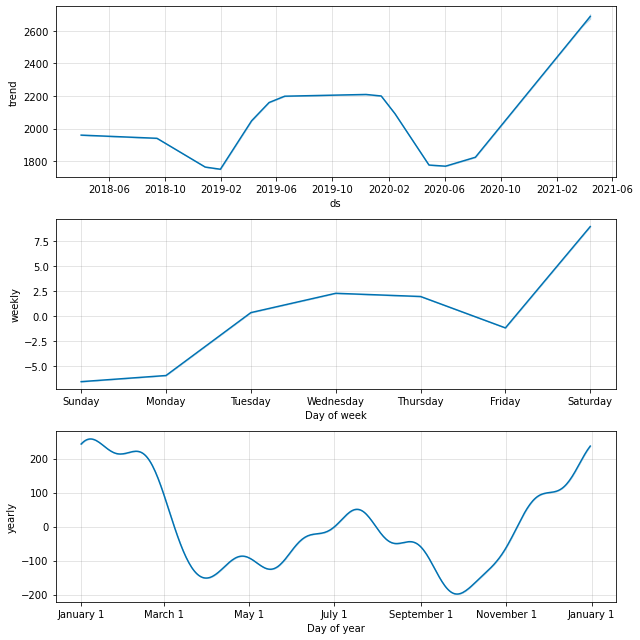

In [42]:
m.plot_components(forecast)

Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations $y_i$ and the corresponding predicted values $\hat{y}_i$.

We can see that this dataframe contains all the information we need except for the historical values. We need to join the `forecast` object with the actual values `y` from the original dataset `df`. For this we will define a helper function that we will reuse later:

In [43]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds")
    )

In [44]:
df.tail(20)

,ds,y
731,2021-03-31,2498.100
732,2021-04-01,2531.450
733,2021-04-05,2445.850
734,2021-04-06,2472.300
735,2021-04-07,2482.700
736,2021-04-08,2502.550
737,2021-04-09,2513.900
738,2021-04-12,2419.850
739,2021-04-13,2512.950
740,2021-04-15,2547.150


In [45]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=10)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2021-04-05,2505.259,2407.020,2595.415,2445.850
2021-04-06,2517.369,2425.164,2604.487,2472.300
2021-04-07,2525.468,2431.868,2610.780,2482.700
2021-04-08,2531.625,2434.405,2623.949,2502.550
2021-04-09,2535.226,2437.571,2629.122,2513.900
2021-04-10,2552.348,2459.772,2640.166,NaN
2021-04-11,2543.952,2449.026,2644.651,NaN
2021-04-12,2551.829,2461.889,2642.385,2419.850
2021-04-13,2565.460,2481.815,2660.613,2512.950


We are also going to define a helper function that we will use to gauge the quality of our forecasting with MAPE and MAE error measures:

In [46]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [47]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 1.6451560621115349
MAE 41.18506290649557
